<a href="https://colab.research.google.com/github/pranali-kirolkar/MSCPROJECT/blob/main/K_MEAN%2CDBSCAN_ALGORITHMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
#importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()
from mlxtend.preprocessing import minmax_scaling
import scipy.cluster.hierarchy as sch
from sklearn import metrics, mixture, cluster, datasets
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.mixture import GaussianMixture
print("Libraries loaded")


Libraries loaded


In [177]:
#Sales of Summer clothes Dataset
Dataset = pd.read_csv('/content/SalesSummerClothes.csv') 

In [178]:
Dataset.drop('Timestamp',axis=1,inplace=True)

In [179]:
Dataset

,Name,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,Bhairavi,18-25,Occasionally,"Jeans,Women Dress,Ladies Tops","NIKE,Adidas",500-700,During the sales,Online,YES,No,4
1,Girish,18-25,Occasionally,"T-shirt,Jeans","NIKE,Adidas,H&M",700-1000,During the sales,Online,YES,Yes,3
2,Mayuri katkar,18-25,Occasionally,"T-shirt,Jeans,Women Dress,Casual Dress,Ladies ...","NIKE,Adidas,H&M,ZARA",200-500,During the sales,By them in Store,YES,Yes,3
3,Harshali,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4
4,Sadamast Nikita Shivaji,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5
...,...,...,...,...,...,...,...,...,...,...,...
197,Rekha,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,4
198,Vaishali kokre,18-25,Regularly,"Women Dress,Casual Dress,Ladies Tops","Adidas,H&M",1000-above,During the sales,By them in Store,YES,No,4
199,Neeta,18-25,Regularly,"T-shirt,Jeans,Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,4
200,Sushant,18-25,Occasionally,"T-shirt,Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4


In [180]:
Dataset.head()

,Name,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,Bhairavi,18-25,Occasionally,"Jeans,Women Dress,Ladies Tops","NIKE,Adidas",500-700,During the sales,Online,YES,No,4
1,Girish,18-25,Occasionally,"T-shirt,Jeans","NIKE,Adidas,H&M",700-1000,During the sales,Online,YES,Yes,3
2,Mayuri katkar,18-25,Occasionally,"T-shirt,Jeans,Women Dress,Casual Dress,Ladies ...","NIKE,Adidas,H&M,ZARA",200-500,During the sales,By them in Store,YES,Yes,3
3,Harshali,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4
4,Sadamast Nikita Shivaji,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5


In [142]:
Dataset.tail()

,Name,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
197,Rekha,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,4
198,Vaishali kokre,18-25,Regularly,"Women Dress,Casual Dress,Ladies Tops","Adidas,H&M",1000-above,During the sales,By them in Store,YES,No,4
199,Neeta,18-25,Regularly,"T-shirt,Jeans,Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,4
200,Sushant,18-25,Occasionally,"T-shirt,Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4
201,Suchita,35-50,Occasionally,"Women Dress,Casual Dress","H&M,ZARA",700-1000,During the sales,By them in Store,YES,Yes,4


In [143]:
len(Dataset)

202

In [144]:
Dataset.shape

(202, 11)

In [145]:
Dataset.dtypes

Name                  object
Age                   object
Buy_Clothes           object
Type_Clothes          object
Brand_Clothes         object
Price                 object
time_prefer           object
prefer_purchasing     object
compare_prices        object
worst_experience      object
Rating                 int64
dtype: object

In [146]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                202 non-null    object
 1   Age                 202 non-null    object
 2   Buy_Clothes         202 non-null    object
 3   Type_Clothes        202 non-null    object
 4   Brand_Clothes       202 non-null    object
 5   Price               202 non-null    object
 6   time_prefer         202 non-null    object
 7   prefer_purchasing   202 non-null    object
 8   compare_prices      202 non-null    object
 9   worst_experience    202 non-null    object
 10  Rating              202 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 17.5+ KB


In [147]:
Dataset['Age']

0      18-25
1      18-25
2      18-25
3      18-25
4      18-25
       ...  
197    18-25
198    18-25
199    18-25
200    18-25
201    35-50
Name: Age, Length: 202, dtype: object

In [148]:
Dataset["Age"].value_counts()

18-25         162
25-35          27
35-50          12
50 - above      1
Name: Age, dtype: int64

In [149]:
Dataset['Age'].isnull().values.any()

False

In [150]:
values = Dataset.values
Dataset

,Name,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,Bhairavi,18-25,Occasionally,"Jeans,Women Dress,Ladies Tops","NIKE,Adidas",500-700,During the sales,Online,YES,No,4
1,Girish,18-25,Occasionally,"T-shirt,Jeans","NIKE,Adidas,H&M",700-1000,During the sales,Online,YES,Yes,3
2,Mayuri katkar,18-25,Occasionally,"T-shirt,Jeans,Women Dress,Casual Dress,Ladies ...","NIKE,Adidas,H&M,ZARA",200-500,During the sales,By them in Store,YES,Yes,3
3,Harshali,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4
4,Sadamast Nikita Shivaji,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5
...,...,...,...,...,...,...,...,...,...,...,...
197,Rekha,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,4
198,Vaishali kokre,18-25,Regularly,"Women Dress,Casual Dress,Ladies Tops","Adidas,H&M",1000-above,During the sales,By them in Store,YES,No,4
199,Neeta,18-25,Regularly,"T-shirt,Jeans,Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,4
200,Sushant,18-25,Occasionally,"T-shirt,Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4


In [151]:
Dataset.Age.head(10)

0    18-25
1    18-25
2    18-25
3    18-25
4    18-25
5    18-25
6    18-25
7    25-35
8    18-25
9    18-25
Name: Age, dtype: object

In [152]:
Dataset.dropna(axis=0,how='any').shape

(202, 11)

In [153]:
Dataset.dropna(axis=0,how='any',inplace=True)

In [154]:
Dataset['Age'] = Dataset['Age'].replace(['all'],'18-25')

In [155]:
Dataset

,Name,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,Bhairavi,18-25,Occasionally,"Jeans,Women Dress,Ladies Tops","NIKE,Adidas",500-700,During the sales,Online,YES,No,4
1,Girish,18-25,Occasionally,"T-shirt,Jeans","NIKE,Adidas,H&M",700-1000,During the sales,Online,YES,Yes,3
2,Mayuri katkar,18-25,Occasionally,"T-shirt,Jeans,Women Dress,Casual Dress,Ladies ...","NIKE,Adidas,H&M,ZARA",200-500,During the sales,By them in Store,YES,Yes,3
3,Harshali,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4
4,Sadamast Nikita Shivaji,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5
...,...,...,...,...,...,...,...,...,...,...,...
197,Rekha,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,4
198,Vaishali kokre,18-25,Regularly,"Women Dress,Casual Dress,Ladies Tops","Adidas,H&M",1000-above,During the sales,By them in Store,YES,No,4
199,Neeta,18-25,Regularly,"T-shirt,Jeans,Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,4
200,Sushant,18-25,Occasionally,"T-shirt,Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4


In [156]:
Dataset.dropna(subset=['Age'],how='all').shape

(202, 11)

In [157]:
Dataset['Age'].fillna(value='18-25')

0      18-25
1      18-25
2      18-25
3      18-25
4      18-25
       ...  
197    18-25
198    18-25
199    18-25
200    18-25
201    35-50
Name: Age, Length: 202, dtype: object

In [158]:
Dataset['Age'].unique()

array(['18-25', '25-35', '35-50', '50 - above'], dtype=object)

In [159]:
Dataset.columns

Index(['Name', 'Age', 'Buy_Clothes', 'Type_Clothes', 'Brand_Clothes', 'Price',
       'time_prefer ', 'prefer_purchasing ', 'compare_prices ',
       'worst_experience', 'Rating '],
      dtype='object')

In [160]:
def split_multicolumn(Brand_Clothes):
    result_df = Brand_Clothes.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in Brand_Clothes[Brand_Clothes.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [161]:
Brand_df = split_multicolumn(Dataset.Brand_Clothes)
Brand_split = Brand_df.sum().sort_values(ascending=False)

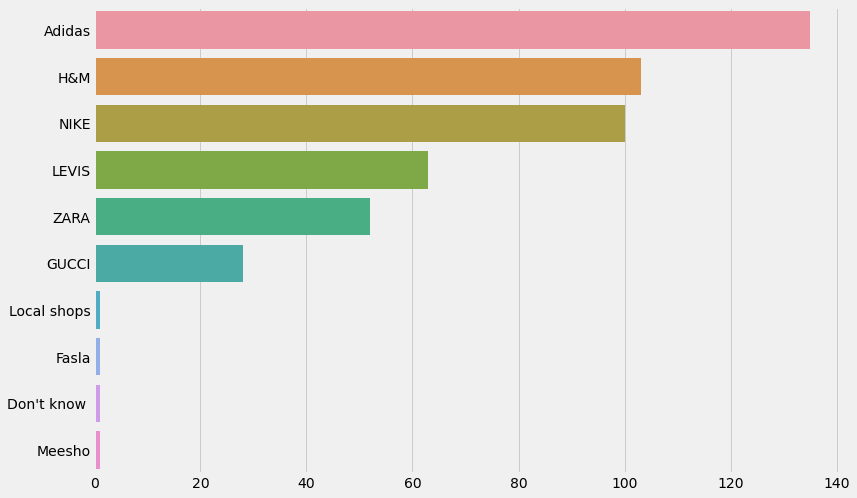

In [162]:
plt.figure(figsize=(12,8))
sns.barplot(x=Brand_split.values, y=Brand_split.index);

In [163]:
def split_multicolumn(Type_Clothes):
    result_df = Type_Clothes.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in Type_Clothes[Type_Clothes.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [164]:
Type_df = split_multicolumn(Dataset.Type_Clothes)
Type_split = Type_df.sum().sort_values(ascending=False)

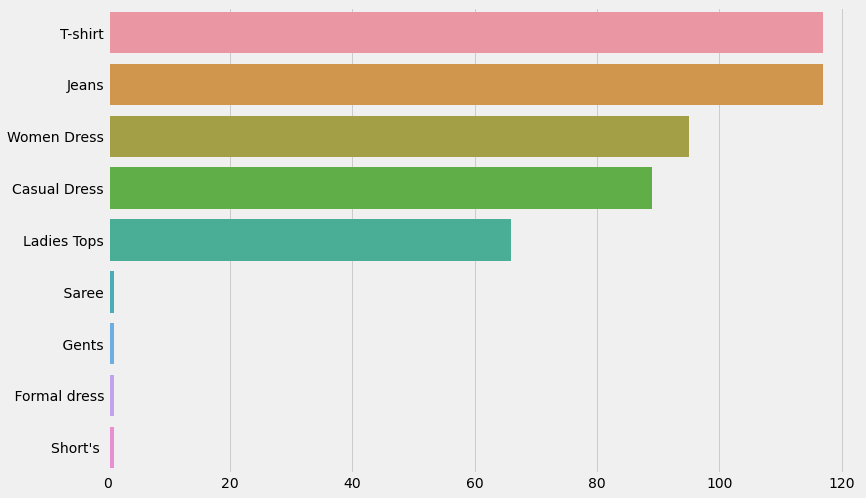

In [165]:
plt.figure(figsize=(12,8))
sns.barplot(x=Type_split.values, y=Type_split.index);

In [190]:
Dataset['Age']=num.fit_transform(Dataset['Age']).astype('int')
Dataset['Buy_Clothes']=num.fit_transform(Dataset['Buy_Clothes']).astype('int')
Dataset['Type_Clothes']=num.fit_transform(Dataset['Type_Clothes']).astype('int')
Dataset['Brand_Clothes']=num.fit_transform(Dataset['Brand_Clothes']).astype('int')
Dataset['Price']=num.fit_transform(Dataset['Price']).astype('int')
Dataset['time_prefer ']=num.fit_transform(Dataset['time_prefer ']).astype('int')
Dataset['prefer_purchasing ']=num.fit_transform(Dataset['prefer_purchasing ']).astype('int')
Dataset['compare_prices ']=num.fit_transform(Dataset['compare_prices ']).astype('int')
Dataset['worst_experience']=num.fit_transform(Dataset['worst_experience']).astype('int')
Dataset['Rating ']=num.fit_transform(Dataset['Rating ']).astype('int')

In [191]:
Dataset

,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,0,0,8,23,2,0,1,1,0,3
1,0,0,13,24,3,0,1,1,1,2
2,0,0,19,26,1,0,0,1,1,2
3,0,0,25,22,2,0,0,1,1,3
4,0,0,25,21,2,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...
197,0,0,0,15,2,0,0,1,0,3
198,0,1,27,1,0,0,0,1,0,3
199,0,1,16,0,3,0,0,1,0,3
200,0,0,13,0,3,1,0,0,0,3


Data Analysis

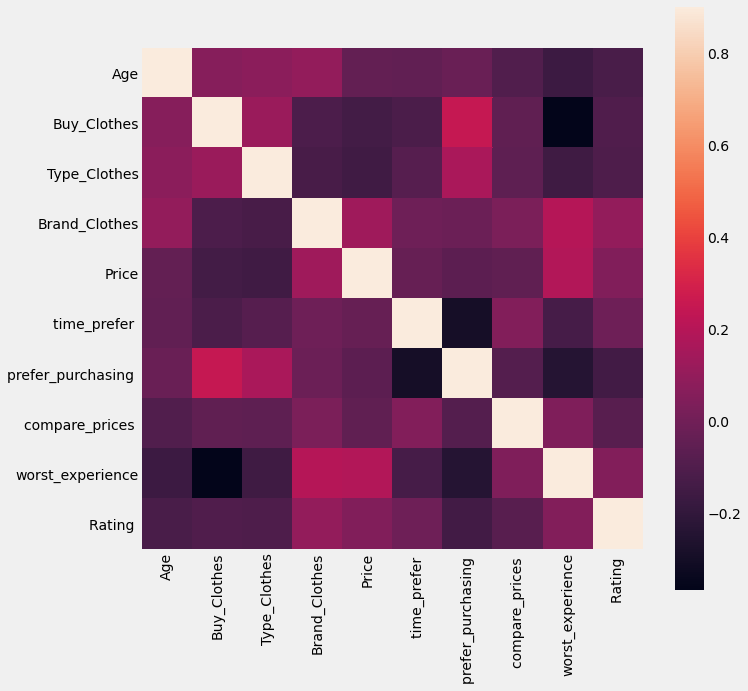

In [168]:
SpearmanCorr = Dataset.corr(method="spearman")
plt.figure(figsize=(10,10))
sns.heatmap(SpearmanCorr, vmax=.9, square=True);

In [181]:
Dataset

,Name,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,Bhairavi,18-25,Occasionally,"Jeans,Women Dress,Ladies Tops","NIKE,Adidas",500-700,During the sales,Online,YES,No,4
1,Girish,18-25,Occasionally,"T-shirt,Jeans","NIKE,Adidas,H&M",700-1000,During the sales,Online,YES,Yes,3
2,Mayuri katkar,18-25,Occasionally,"T-shirt,Jeans,Women Dress,Casual Dress,Ladies ...","NIKE,Adidas,H&M,ZARA",200-500,During the sales,By them in Store,YES,Yes,3
3,Harshali,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4
4,Sadamast Nikita Shivaji,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5
...,...,...,...,...,...,...,...,...,...,...,...
197,Rekha,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,4
198,Vaishali kokre,18-25,Regularly,"Women Dress,Casual Dress,Ladies Tops","Adidas,H&M",1000-above,During the sales,By them in Store,YES,No,4
199,Neeta,18-25,Regularly,"T-shirt,Jeans,Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,4
200,Sushant,18-25,Occasionally,"T-shirt,Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4


In [182]:
C = (Dataset.dtypes == 'object')
CategoricalVariables = list(C[C].index)
Integer = (Dataset.dtypes == 'int64') 
Float   = (Dataset.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (Dataset.isnull().sum()).sum()/np.product(Dataset.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,2)) + " %")

Dataset[NumericVariables]=Dataset[NumericVariables].fillna(0)

Dataset[CategoricalVariables]=Dataset[CategoricalVariables].fillna('Unknown')

C = (Dataset.dtypes == 'object')
CategoricalVariables = list(C[C].index)
Integer = (Dataset.dtypes == 'int64') 
Float   = (Dataset.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (Dataset.isnull().sum()).sum()/np.product(Dataset.shape)*100
print("The number of missing entries after cleaning: " + str(round(Missing_Percentage,2)) + " %")
print("The number of categorical variables:" + str(len(CategoricalVariables)))
print("The number of numeric variables:" + str(len(NumericVariables)))


The number of missing entries before cleaning: 0.0 %
The number of missing entries after cleaning: 0.0 %
The number of categorical variables:10
The number of numeric variables:1


In [185]:
OrdinalVariables = ['Name']
print(OrdinalVariables)

['Name']


In [186]:
NominalVariables = [x for x in CategoricalVariables if x not in OrdinalVariables]
Lvl = Dataset[NominalVariables].nunique()

ToDrop=['Name']
Dataset = Dataset.drop(ToDrop, axis = 1)
FinalNominalVariables = [x for x in NominalVariables if x not in ToDrop]

df_dummy = pd.get_dummies(Dataset[FinalNominalVariables], columns=FinalNominalVariables)
print(ToDrop)

['Name']


In [187]:
df_clean = Dataset.drop(FinalNominalVariables, axis = 1)
df_clean = pd.concat([df_clean, df_dummy], axis=1)

NumericVariablesNoTarget = [x for x in NumericVariables if x not in ['units_sold']]
df_scale=df_clean
df_scale[NumericVariables] = minmax_scaling(df_clean, columns=NumericVariables)
print(FinalNominalVariables + NumericVariables + OrdinalVariables)

['Age', 'Buy_Clothes', 'Type_Clothes', 'Brand_Clothes', 'Price', 'time_prefer ', 'prefer_purchasing ', 'compare_prices ', 'worst_experience', 'Rating ', 'Name']


Hierarchical clustering

In [192]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

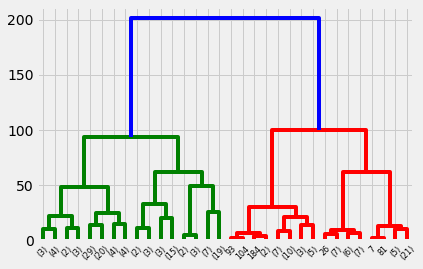

In [193]:
X = Dataset.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

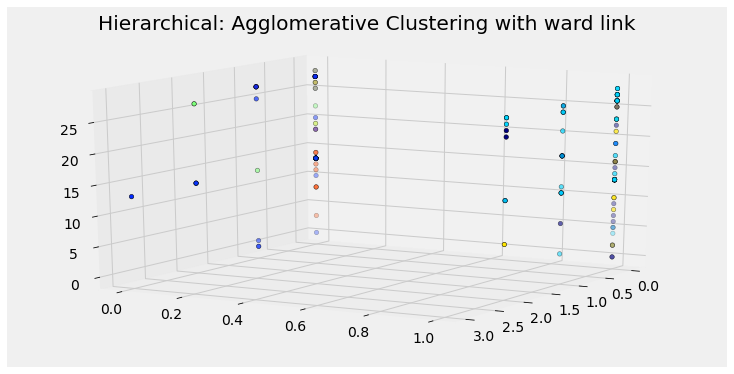

In [194]:
AWcluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
AWcluster.fit(df_scale)
AWlabels = AWcluster.labels_
AWcluster_fit = AWcluster.fit(X)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), facecolor='w', edgecolor='k')
ax = p3.Axes3D(fig)
ax.view_init(15, 30)
for l in np.unique(AWlabels):
    ax.scatter(X[AWlabels == l, 0], X[AWlabels == l, 1], X[AWlabels == l, 2],color=plt.cm.jet(float(l) / np.max(AWlabels + 1)),s=20, edgecolor='k')
plt.title('Hierarchical: Agglomerative Clustering with ward link' )

plt.show()

K-means clustering

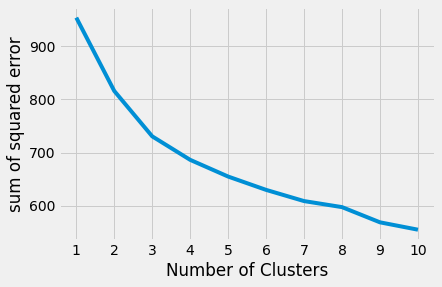

In [195]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(df_scale)
   sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("sum of squared error")
plt.show()

In [196]:
KMcluster = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
KMcluster.fit(df_scale)
print('The inertia equals to:' + format(KMcluster.inertia_))

The inertia equals to:686.4240617620513


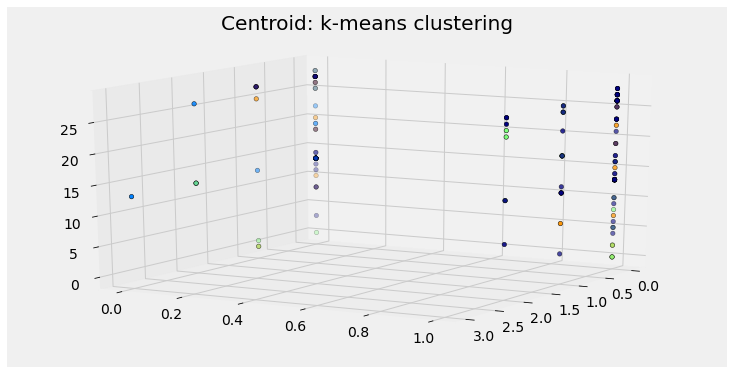

In [197]:
KMcluster_fit = KMcluster.fit(df_scale)
KMlabels = KMcluster.labels_

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), facecolor='w', edgecolor='k')
ax = p3.Axes3D(fig)
ax.view_init(15, 30)
for l in np.unique(KMlabels):
    ax.scatter(X[KMlabels == l, 0], X[KMlabels == l, 1], X[KMlabels == l, 2],color=plt.cm.jet(float(l) / np.max(KMlabels + 1)),s=20, edgecolor='k')
plt.title('Centroid: k-means clustering' )

plt.show()

Expectation-maximization algorithm

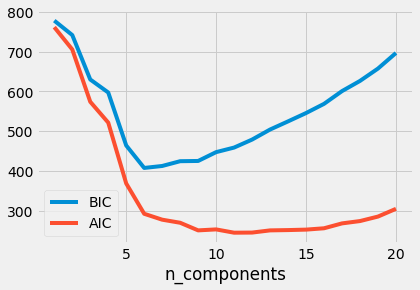

In [198]:
#Bayesian information criterion (BIC)
# Akaike information criterion (AIC)
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)

GM_n_components = np.arange(1, 21)
GM_models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in GM_n_components]

plt.plot(GM_n_components, [m.bic(Xmoon) for m in GM_models], label='BIC')
plt.plot(GM_n_components, [m.aic(Xmoon) for m in GM_models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [199]:
GM_n_classes = 6 #len(np.unique(df_scale))

GMcluster = mixture.GaussianMixture(n_components=GM_n_classes, covariance_type='full')
GMcluster_fit = GMcluster.fit(df_scale)
GMlabels = GMcluster_fit.predict(df_scale)
print('Number of clusters: ' + format(len(np.unique(GMlabels))))

Number of clusters: 6


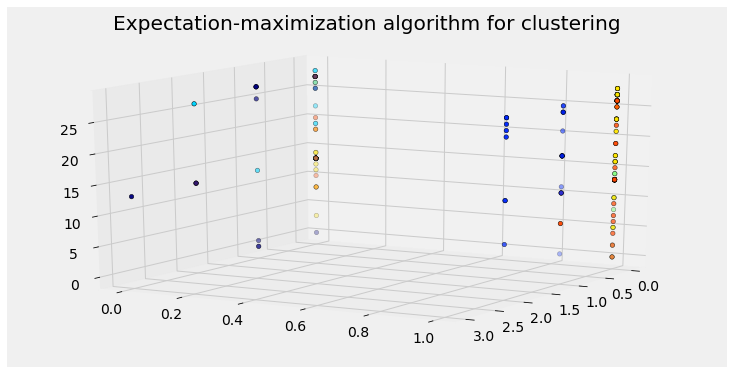

In [200]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), facecolor='w', edgecolor='k')
ax = p3.Axes3D(fig)
ax.view_init(15, 30)
for l in np.unique(GMlabels):
    ax.scatter(X[GMlabels == l, 0], X[GMlabels == l, 1], X[GMlabels == l, 2],color=plt.cm.jet(float(l) / np.max(GMlabels + 1)),s=20, edgecolor='k')
plt.title('Expectation-maximization algorithm for clustering' )

plt.show()

Density-based spatial clustering of applications with noise

In [206]:
DBcluster= DBSCAN(eps=0.3, min_samples=10)
DBcluster_fit = DBcluster.fit(df_scale)
core_samples_mask = np.zeros_like(DBcluster_fit.labels_, dtype=bool)
core_samples_mask[DBcluster_fit.core_sample_indices_] = True
DBlabels = DBcluster_fit.labels_

In [207]:
DB_n_clusters_ = len(set(DBlabels)) 
DB_n_noise_ = list(DBlabels).count(-1)
print('Estimated number of clusters: %d' % DB_n_clusters_)
print('Estimated number of noise points: %d' % DB_n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 191


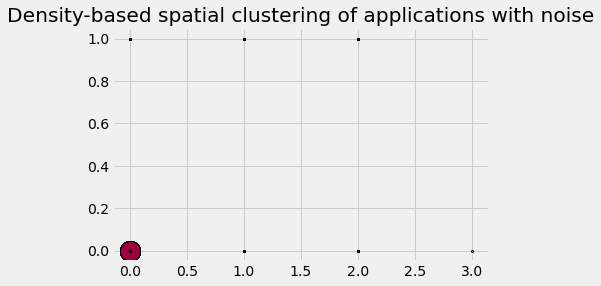

In [208]:
unique_labels = set(DBlabels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [1, 0, 0, 0]

    class_member_mask = (DBlabels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=20)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=2)

plt.title('Density-based spatial clustering of applications with noise')
plt.show()

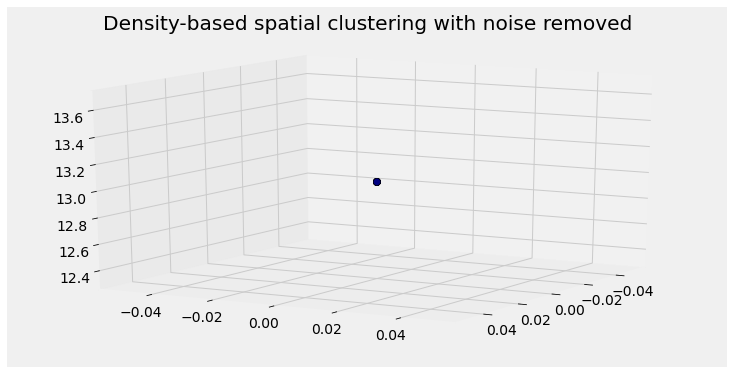

In [209]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), facecolor='w', edgecolor='k')
ax = p3.Axes3D(fig)
ax.view_init(15, 30)
for l in range(0,4):
    ax.scatter(X[DBlabels == l, 0], X[DBlabels == l, 1], X[DBlabels == l, 2],color=plt.cm.jet(float(l) / np.max(DBlabels + 1)),s=50, edgecolor='k')
plt.title('Density-based spatial clustering with noise removed' )

plt.show()

In [210]:
KMunique, KMcounts = np.unique(KMlabels, return_counts=True)
AWunique, AWcounts = np.unique(AWlabels, return_counts=True)
AAunique, AAcounts = np.unique(AWlabels, return_counts=True)
DBunique, DBcounts = np.unique(DBlabels, return_counts=True)
GMunique, GMcounts = np.unique(GMlabels, return_counts=True)
print('K-means distributed points: ' + format(dict(zip(KMunique, KMcounts))))
print('Hierarchical ward link distributed points: ' + format(dict(zip(AWunique, AWcounts))))
print('Hierarchical average link distributed points: ' + format(dict(zip(AAunique, AAcounts))))
print('DBSCAN distributed points: ' + format(dict(zip(DBunique, DBcounts))))
print('Gaussian Mixture distributed points: ' + format(dict(zip(GMunique, GMcounts))))

K-means distributed points: {0: 86, 1: 45, 2: 33, 3: 38}
Hierarchical ward link distributed points: {0: 41, 1: 30, 2: 52, 3: 42, 4: 18, 5: 19}
Hierarchical average link distributed points: {0: 41, 1: 30, 2: 52, 3: 42, 4: 18, 5: 19}
DBSCAN distributed points: {-1: 191, 0: 11}
Gaussian Mixture distributed points: {0: 17, 1: 20, 2: 54, 3: 44, 4: 35, 5: 32}
